In [27]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import apogee_analysis as aah

Below, we investigate the equilibrium trends using a simple formalism. To begin, recall that the equilibrium abundance for carbon is 

$$
\dot{M}_c = y_c^{cc} \dot{M}_\star + y_c^{agb} \langle \dot{M}_\star \rangle_{agb} - (1 + \eta - r) Z_c \dot{M}_\star
$$

Where
$$
\langle \dot{M}_\star \rangle_{agb}(T) = \int_0^T \dot{M}_\star(t) f_{agb}(T - t)\ dt
$$
where $f_{agb}$ is the fraction of AGB stars with a lifetime $t$. If we make the approximation that all AGB stars have the same lifetime, $\tau_{agb} \approx 3$, we can write:
$$
\langle \dot{M}_\star \rangle_{agb}(T) =\dot{M}_\star(T - \tau_{agb}) 
$$

We can solve the first equation for the equilibrium abundace:
$$
Z_c^{eq} = \frac{y_c^{cc} + y_c^{agb} \frac{\langle \dot{M}_\star \rangle_{agb}}{\dot{M}_\star} }{1 + \eta - r}
$$

Also, make the approximation that $y_c^{agb} = \alpha + Z \beta$ where $\alpha$ and $\beta$ are arbitrary coefficients representing the limiting low metallicity carbon AGB yield and the AGB yield dependence on metalicity. To further simplify, assume an exponentially declining SFH: $\dot{M}_\star \propto e^{-t/\tau_{sfh}}$, we can write 
$$
\frac{\langle \dot{M}_\star \rangle_{agb}}{\dot{M}_\star} = e^{\tau_{agb}/\tau_{sfh}}
$$
Using these substitutions, we can write:
$$
Z_c^{eq}(R) = \frac{y_c^{cc} + (\alpha + \beta Z(R))  e^{\frac{\tau_{agb}}{\tau_{sfh}(R)}} }{1 + \eta(R) - r}
$$

Since we also know the equilibrium abundance of oxygen:
$$
Z_o^{eq}(R) = \frac{y_o^{cc}}{1 + \eta(R) - r}
$$
we can make plots of \[C/O\]-\[O/H\] of the equilibrium abundance tracks, which should be an accurate approximation of the model results.

In [5]:
import vice
mw = vice.milkyway(zone_width=0.1)

In [17]:
R = np.arange(0, 15.5, 0.1)
eta = np.array(
    [mw.mass_loading(r) for r in R]
)



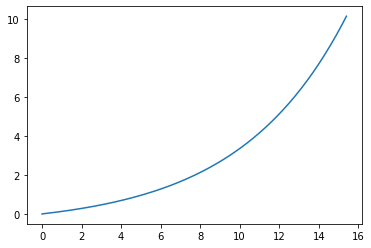

In [18]:
plt.plot(R, eta)

In [28]:
out = vice.output("output/cristallo11")

In [68]:
out.zones["zone0"].history

vice.dataframe{
    time -----------> [0, 0.01, 0.02, ... , 13.18, 13.19, 13.2]
    mgas -----------> [1e-12, 336779, 408181, ... , 4.16014e+06, 4.15431e+06, 4.14849e+06]
    mstar ----------> [0, 909.363, 2241.23, ... , 3.77484e+07, 3.77575e+07, 3.77665e+07]
    sfr ------------> [0, 0.000100568, 0.000200283, ... , 0.00201013, 0.00200663, 0.00200313]
    ifr ------------> [nan, 0.033782, 0.00733785, ... , 0.000407526, 0.000392588, 0.000386761]
    ofr ------------> [7.29544e+168, 3.50833e-06, 6.98693e-06, ... , 7.01237e-05, 7.00016e-05, 6.98797e-05]
    eta_0 ----------> [0.0348852, 0.0348852, 0.0348852, ... , 0.0348852, 0.0348852, 0.0348852]
    r_eff ----------> [nan, 0.0957713, 0.107988, ... , 0.547805, 0.550214, 0.551645]
    z_in(fe) -------> [0, 0, 0, ... , 0, 0, 0]
    z_in(o) --------> [0, 0, 0, ... , 0, 0, 0]
    z_in(n) --------> [0, 0, 0, ... , 0, 0, 0]
    z_in(c) --------> [0, 0, 0, ... , 0, 0, 0]
    z_out(fe) ------> [0, 3.57233e-06, 8.79148e-06, ... , 0.00576333, 0.005

In [69]:
Z = np.array([out.zones["zone%i" % i].history["z"][-1] for i in range(155)])
eta = np.array([out.zones["zone%i" % i].history["eta_0"][-1] for i in range(155)])

In [80]:
def m_star(R, t):
    if True:

        T = int(100*t) - 1
        return [out.zones["zone%i" % int(i)].history["sfr"][T] for i in 10*R]
    else:
        i = int(10*R)

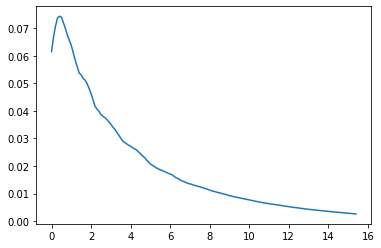

In [77]:
plt.plot(R, Z)

In [78]:
mw.evolution

<function vice.milkyway.milkyway.milkyway.default_evolution(radius, time)>

In [81]:
tau_sfh = 2.5
tau_agb = 3
y_o_cc = 0.015
y_c_cc = 0.002
alpha = 0.003
beta = -0.02
r = 0.6
o_eq = y_o_cc/(1 + eta - r)
c_eq = (y_c_cc + (alpha + beta*Z)*m_star(R, 13.2 - tau_agb)/m_star(R, 13.2))/(1 + eta - r)
o_h = aah.abundance_to_bracket(o_eq, "O")
c_h = aah.abundance_to_bracket(c_eq, "C")
c_o = c_h - o_h

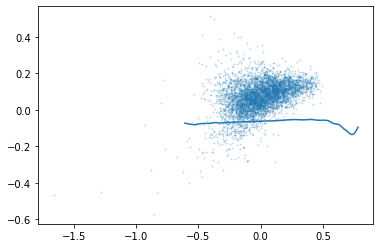

In [82]:
plt.plot(o_h, c_h - o_h)
aah.plot_apogee_cooh()

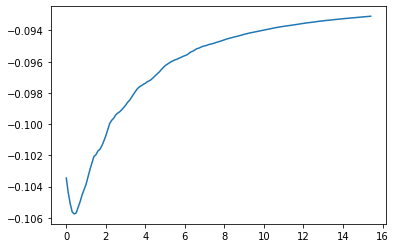

In [63]:
plt.plot(R, c_h - o_h)